<H2>課題3: クラスタリング</H2>
<p>本課題で使用するデータは総務省の人口データ(http://www.stat.go.jp/data/jinsui/2016np/index.html)　を加工したものです。</p>
<p>0歳から100歳（以上）までの各年齢における総人口数、及び男女の人数が記載されています。</p>
<p>3章で学んだ内容を踏まえ、各セルに'#コメント'の内容を実行するコードを記入してください。</p>

<H2>1. 必要なモジュールの読み込み

In [2]:
try:
    xrange
except NameError:
    xrange = range

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

%matplotlib inline

<H2>2. データの読み込み</H2>
<p>CSVファイル"japan_number.csv"を読み込み、内容を確認します。</p>

In [3]:
# データ読み込み
dataset = pd.read_csv('japan_number.csv')

In [4]:
# データを最初の5行だけ表示
dataset.head()

,Yearsold,Total,Man,Woman
0,0,957,489,469
1,1,970,497,474
2,2,1007,514,492
3,3,1013,518,495
4,4,1041,533,507


In [5]:
# 年齢データはカテゴリ変数であり不要なため、列'Yearsold'を削除
cols = ['Total', 'Man', 'Woman']

In [6]:
# 最初の5行を表示して列が削除されたことを確認
dataset.head()

,Yearsold,Total,Man,Woman
0,0,957,489,469
1,1,970,497,474
2,2,1007,514,492
3,3,1013,518,495
4,4,1041,533,507


<H2>3. データの正規化</H2>
<p>クラスタリングはユークリッド距離に基づいて行われるため、スケールは重要です。</p>

In [7]:
# 正規化を実施
cols = ['Total', 'Man', 'Woman']
dataset_for_cl = dataset[cols]

In [8]:
# 正規化後のデータを確認
scaler = MaxAbsScaler()
dataset_for_cl_scaled = scaler.fit_transform(dataset_for_cl)

dataset_for_cl_scaled[:5]

array([[0.43818681, 0.46175637, 0.41688889],
       [0.44413919, 0.46931067, 0.42133333],
       [0.46108059, 0.48536355, 0.43733333],
       [0.46382784, 0.4891407 , 0.44      ],
       [0.47664835, 0.503305  , 0.45066667]])

<H2> 4. データの可視化

Text(0,0.5,'x2')

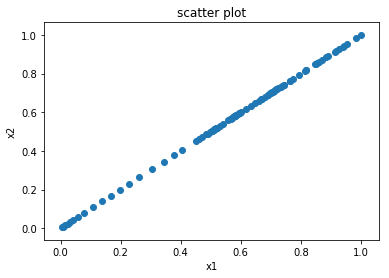

In [9]:
# 正規化したデータを散布図にPlotし、分布を確認します。
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(dataset_for_cl_scaled[:, 1], dataset_for_cl_scaled[:, 1])
ax.set_title('scatter plot')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

<H2> 5. クラスター数の決定</H2>
<p>ここではElbow Methodとシルエットプロットを用いてクラスター数を決定してみましょう。</p>

<h3>Elbow Method

In [10]:
# 最大クラスター数を10としてWCSS(within-cluster sum of square)値を取得
max_cluster = 10

cluster_ = range(1, max_cluster)
intra_sum_of_square_list = []
for k in cluster_:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    km.fit(dataset)
    intra_sum_of_square_list.append(km.inertia_)

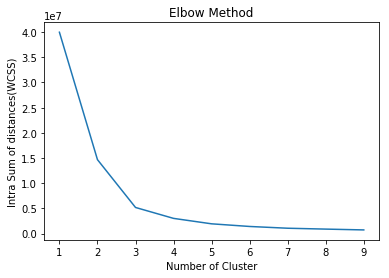

In [11]:
# 上記結果をplotにて可視化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Elbow Method')
ax.set_xlabel('Number of Cluster')
ax.set_ylabel('Intra Sum of distances(WCSS)')
plt.plot(cluster_, intra_sum_of_square_list)

<h3>シルエットメソッド

In [12]:
# K-means法でクラスタリングの実施
n_clusters = 4
km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300)
km.fit(dataset)
cluster_labels = km.predict(dataset)

In [13]:
# シルエットスコアの平均を算出
silhouette_ave = silhouette_score(dataset, cluster_labels)

In [14]:
# それぞれのデータ点のシルエットスコアを算出する
each_silhouette_score = silhouette_samples(dataset, cluster_labels, metric='euclidean')

In [15]:
#  シルエットプロットを作図
colorlist = ['tomato', 'antiquewhite', 'blueviolet', 'cornflowerblue',
             'darkgreen', 'seashell', 'skyblue', 'mediumseagreen']


<H2>6.  結果の確認

正規化後に作成したPlotをクラスターごとに色分けし、どのようにクラスターが分かれているのか確認します。

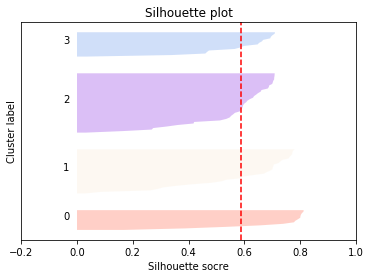

In [17]:
#　グラフの描画の初期化
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = each_silhouette_score[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = colorlist[i]
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,facecolor=color, alpha=0.3)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10
    
ax.set_title("Silhouette plot")
ax.set_xlabel("Silhouette socre")
ax.set_ylabel("Cluster label")

ax.axvline(x=silhouette_ave, color="red", linestyle='--')
ax.set_yticks([])
ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

#　クラスターの番号をユニークにします
cluster_ids = list(set(cluster_labels))




In [18]:
#　クラスターごとに色を変えながら、散布図に出力していきます
for k in range(len(cluster_ids)):
    cluster_id = cluster_ids[k]
    label_ = 'cluster = %d' % cluster_id
    data_by_cluster = dataset[cluster_labels == cluster_id]
    ax.scatter(data_by_cluster.iloc[:,0], data_by_cluster.iloc[:,1], c=colorlist[k], label=label_)
ax.set_title('Clustering')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='lower right')